In [83]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import stem
stemmer = stem.PorterStemmer()
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
import string
punct = list(string.punctuation)
from collections import Counter
import requests
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
!pip install PRAW
import numpy as np
import praw
import datetime
import nltk
!pip install wordcloud
!pip install textblob





[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
df_fashion = pd.read_csv('df_fashion_post_coding.csv')

In [85]:
df_fashion

title  score  \
0    Canadian Fashion Mogul Peter Nygard Denied Bai...    400   
1    Iman Pays Tribute to Late Designer Thierry Mug...    352   
2    Glass reviews Dior’s Cruise 2021 Collection fe...     71   
3                               Role Model: Iris Apfel    168   
4     How Shein got away with daylight robbery in 2021    500   
..                                                 ...    ...   
495  Where can you get high waisted, long skirts li...     14   
496         Anyone else here into Dolly Kei/Mori Girl?     13   
497  Does anyone know where I can find a cape like ...     24   
498                       Why men don't wear skirts ??     14   
499                                  Skirts and Stairs      7   

                                              comments  \
0                                                   []   
1                                                   []   
2                                                   []   
3                                                   []   
4                                                   []   
..                                                 ...   
495  ["[Asos](http://www.asos.com/Women/Skirts/Cat/...   
496  ["I love *looking* at Dolly Kei and Mori Girl,...   
497  ["I don't know where you can find a cape that ...   
498  ["I don't think it's really that big of a deal...   
499  ["Same problem. I usually will hold my hands b...   

                                       title_tokenized  \
0    ['Canadian', 'Fashion', 'Mogul', 'Peter', 'Nyg...   
1    ['Iman', 'Pays', 'Tribute', 'to', 'Late', 'Des...   
2    ['Glass', 'reviews', 'Dior', '’', 's', 'Cruise...   
3              ['Role', 'Model', ':', 'Iris', 'Apfel']   
4    ['How', 'Shein', 'got', 'away', 'with', 'dayli...   
..                                                 ...   
495  ['Where', 'can', 'you', 'get', 'high', 'waiste...   
496  ['Anyone', 'else', 'here', 'into', 'Dolly', 'K...   
497  ['Does', 'anyone', 'know', 'where', 'I', 'can'...   
498  ['Why', 'men', 'do', "n't", 'wear', 'skirts', ...   
499                        ['Skirts', 'and', 'Stairs']   

                                      title_lemmatized  \
0    Canadian Fashion Mogul Peter Nygard Denied Bai...   
1    Iman Pays Tribute to Late Designer Thierry Mug...   
2    Glass review Dior ’ s Cruise 2021 Collection f...   
3                              Role Model : Iris Apfel   
4     How Shein got away with daylight robbery in 2021   
..                                                 ...   
495  Where can you get high waisted , long skirt li...   
496        Anyone else here into Dolly Kei/Mori Girl ?   
497  Does anyone know where I can find a cape like ...   
498                      Why men do n't wear skirt ? ?   
499                                  Skirts and Stairs   

                                    comments_tokenized  \
0                                                   []   
1                                                   []   
2                                                   []   
3                                                   []   
4                                                   []   
..                                                 ...   
495  [['[', 'Asos', ']', '(', 'http', ':', '//www.a...   
496  [['I', 'love', '*', 'looking', '*', 'at', 'Dol...   
497  [['I', 'do', "n't", 'know', 'where', 'you', 'c...   
498  [['I', 'do', "n't", 'think', 'it', "'s", 'real...   
499  [['Same', 'problem', '.', 'I', 'usually', 'wil...   

                                   comments_lemmatized  \
0                                                   []   
1                                                   []   
2                                                   []   
3                                                   []   
4                                                   []   
..                                                 ...   
495  ["[ Asos ] ( http : //www.asos.com/Women/Skirt...   
496  ["I love * 

In [86]:
print(df_fashion['title_lemmatized'].head())

0    Canadian Fashion Mogul Peter Nygard Denied Bai...
1    Iman Pays Tribute to Late Designer Thierry Mug...
2    Glass review Dior ’ s Cruise 2021 Collection f...
3                              Role Model : Iris Apfel
4     How Shein got away with daylight robbery in 2021
Name: title_lemmatized, dtype: object


In [87]:
from collections import Counter


all_words = [word for title in df_fashion['title_lemmatized_no_punct_and_stopwords'] for word in title.split()]


top_words = Counter(all_words).most_common(10)

print(top_words)

[('Fashion', 80), ('fashion', 41), ('Week', 29), ('’', 27), ('New', 17), ('dress', 17), ('Women', 15), ('Online', 15), ('Old', 14), ('Designer', 13)]


In [88]:
#SENTIMENT ANALYSES 

In [89]:
print(df_fashion.columns)

Index(['title', 'score', 'comments', 'title_tokenized', 'title_lemmatized',
       'comments_tokenized', 'comments_lemmatized',
       'title_lemmatized_no_punct', 'title_lemmatized_no_punct_and_stopwords'],
      dtype='object')


In [90]:
from textblob import TextBlob

def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df_fashion['comment_sentiment'] = df_fashion['comments'].apply(lambda x: [get_sentiment_polarity(comment) for comment in x])
df_fashion['title_sentiment'] = df_fashion['title'].apply(lambda x: get_sentiment_polarity(x))


df_fashion['combined_sentiment'] = df_fashion.apply(lambda x: x['title_sentiment'] + sum(x['comment_sentiment']), axis=1)


df_fashion['post_sentiment'] = df_fashion['combined_sentiment'] / (len(df_fashion['title']) + sum(df_fashion['comments'].apply(lambda x: len(x))))



In [91]:
def display_top_titles(df, title_col, sentiment_col):
    df_sorted = df.sort_values(sentiment_col, ascending=False)
    print("Top 10 most positive titles:")
    for title in df_sorted.head(10)[title_col]:
        print(title)
    print("\nTop 10 most negative titles:")
    for title in df_sorted.tail(10)[title_col]:
        print(title)

display_top_titles(df_fashion, 'title', 'post_sentiment')



Top 10 most positive titles:
Best Home Fashion Coupon Codes 2013
The Best of Paris Fashion Week Men's Fall/Winter 2020
The Best Eyeglasses for Your Face Shape - Insight Vision
Best tees on Store Opening
Purchase Wholesale Custom Jewelry to Make Assured That You Have the Perfect Jewelry for Every Occasion
Perfect Dress For Women
How to get flawless skin with home remedies
A Closer Look At The Technology That Makes Smith Ski Helmets So Awesome
6 Best Formal Shoes for Men for 2013
Best and Cheapest Online Women's clothing store

Top 10 most negative titles:
Victoria Secret fashion show cancelled
Why 4 Models Won’t Be Allowed at Victoria’s Secret Fashion Show in China
My friends thought white TOMS were boring. so...
Those look extremely uncomfortable
If You Are Crazy About Handcrafted Fashion Trends, Here Is Something For You
Where do I find these "You mad bro?" and "I ain't even mad" couple sweatshirts? 
Why you should just say no to ugly Christmas sweaters
I hate when my ice cream dress 

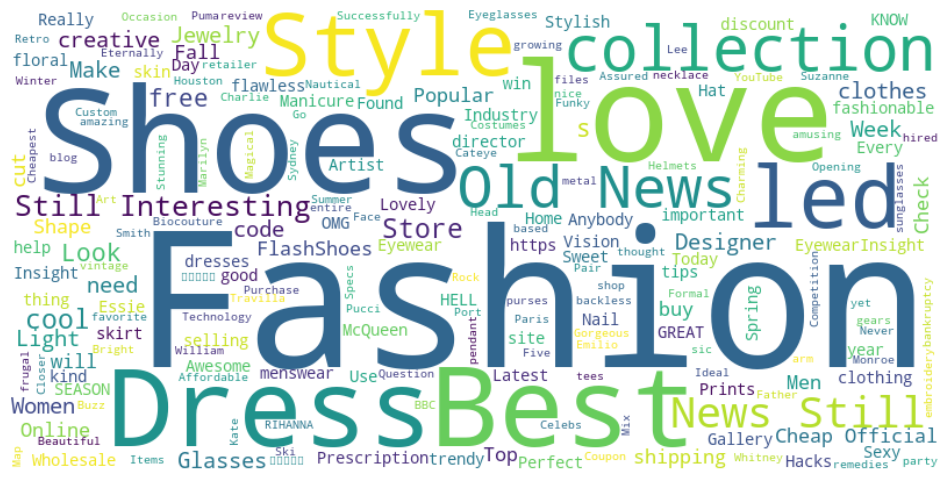

In [92]:
from wordcloud import WordCloud


top_titles = df_fashion.sort_values('title_sentiment', ascending=False)['title'].head(100)


title_string = ' '.join(top_titles)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_string)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [94]:
!pip install spacy
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.5 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [95]:


import spacy
import nltk
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
from nltk.corpus import stopwords




stop_words = set(stopwords.words('english'))




def extract_entities(text):
    doc = nlp(text)
    cities = [entity.text for entity in doc.ents if entity.label_ == 'GPE']
    dates = [entity.text for entity in doc.ents if entity.label_ == 'DATE']
    persons = [entity.text for entity in doc.ents if entity.label_ == 'PERSON']
    nouns = [entity.text for entity in doc.ents if entity.label_ == 'NORP']
    facilities = [entity.text for entity in doc.ents if entity.label_ == 'FAC']
    organizations = [entity.text for entity in doc.ents if entity.label_ == 'ORG']
    locations = [entity.text for entity in doc.ents if entity.label_ == 'LOC']
    products = [entity.text for entity in doc.ents if entity.label_ == 'PRODUCT']
    events = [entity.text for entity in doc.ents if entity.label_ == 'EVENT']
    works_of_art = [entity.text for entity in doc.ents if entity.label_ == 'WORK_OF_ART']
    languages = [entity.text for entity in doc.ents if entity.label_ == 'LANGUAGE']
    
    return list(set(cities)), list(set(dates)), list(set(persons)), list(set(nouns)), list(set(facilities)), list(set(organizations)), list(set(locations)), list(set(products)), list(set(events)), list(set(works_of_art)), list(set(languages))


df_fashion[['cities', 'dates', 'persons', 'nouns', 'facilities', 'organizations', 'locations', 'products', 'events', 'works_of_art', 'languages']] = df_fashion.apply(
    lambda row: pd.Series(extract_entities(row['title'] + ' ' + row['comments'])), axis=1)


print(df_fashion.head())


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               title  score comments  \
0  Canadian Fashion Mogul Peter Nygard Denied Bai...    400       []   
1  Iman Pays Tribute to Late Designer Thierry Mug...    352       []   
2  Glass reviews Dior’s Cruise 2021 Collection fe...     71       []   
3                             Role Model: Iris Apfel    168       []   
4   How Shein got away with daylight robbery in 2021    500       []   

                                     title_tokenized  \
0  ['Canadian', 'Fashion', 'Mogul', 'Peter', 'Nyg...   
1  ['Iman', 'Pays', 'Tribute', 'to', 'Late', 'Des...   
2  ['Glass', 'reviews', 'Dior', '’', 's', 'Cruise...   
3            ['Role', 'Model', ':', 'Iris', 'Apfel']   
4  ['How', 'Shein', 'got', 'away', 'with', 'dayli...   

                                    title_lemmatized comments_tokenized  \
0  Canadian Fashion Mogul Peter Nygard Denied Bai...                 []   
1  Iman Pays Tribute to Late Designer Thierry Mug...                 []   
2  Gl

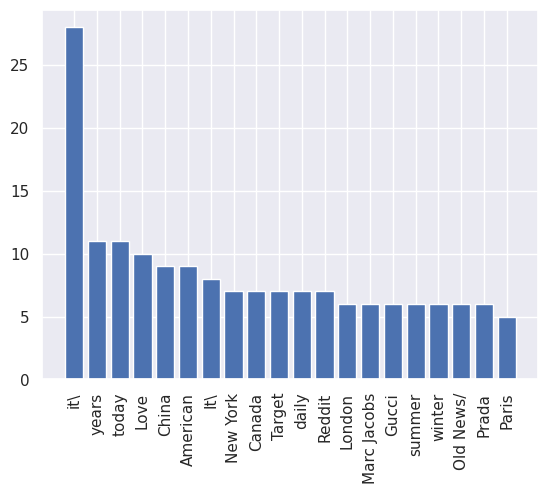

In [98]:
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter


def filter_entities(entities):
    filtered = [entity for entity in entities if entity not in STOP_WORDS and len(entity) > 2 and not entity.isdigit()]
    return filtered


all_entities = df_fashion['cities'].tolist() + df_fashion['dates'].tolist()+ df_fashion['persons'].tolist()+ df_fashion['nouns'].tolist()+ df_fashion['facilities'].tolist()+ df_fashion['organizations'].tolist()+ df_fashion['locations'].tolist()+ df_fashion['products'].tolist()+ df_fashion['events'].tolist()+ df_fashion['works_of_art'].tolist()+ df_fashion['languages'].tolist()

all_entities = [item for sublist in all_entities for item in sublist]

all_entities = filter_entities(all_entities)

entity_counts = Counter(all_entities)

top_entities = entity_counts.most_common(20)
x, y = zip(*top_entities)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [99]:
cities_counter = Counter([item for sublist in df_fashion['cities'].tolist() for item in sublist])
top_cities = cities_counter.most_common(5)
print("Top 5 cities:")
for city, count in top_cities:
    print(city, count)

dates_counter = Counter([item for sublist in df_fashion['dates'].tolist() for item in sublist])
top_dates = dates_counter.most_common(5)
print("\nTop 5 dates:")
for date, count in top_dates:
    print(date, count)

persons_counter = Counter([item for sublist in df_fashion['persons'].tolist() for item in sublist])
top_persons = persons_counter.most_common(5)
print("\nTop 5 persons:")
for person, count in top_persons:
    print(person, count)

organizations_counter = Counter([item for sublist in df_fashion['organizations'].tolist() for item in sublist])
top_organizations = organizations_counter.most_common(5)
print("\nTop 5 organizations:")
for org, count in top_organizations:
    print(org, count)

languages_counter = Counter([item for sublist in df_fashion['languages'].tolist() for item in sublist])
top_languages = languages_counter.most_common(5)
print("\nTop 5 languages:")
for lang, count in top_languages:
    print(lang, count)

Top 5 cities:
US 12
China 9
Canada 7
New York 6
London 6

Top 5 dates:
years 11
today 11
2014 10
2012 7
daily 7

Top 5 persons:
Ralph Lauren 5
Marc Jacobs 5
Gucci 4
Lol 4
Burberry 4

Top 5 organizations:
it\ 21
It\ 8
Old News/ 6
Prada 6
Chanel 5

Top 5 languages:
English 2
French 1


In [100]:
!pip install gensim
import pandas as pd
import gensim
from gensim import corpora




docs = df_fashion['title_lemmatized_no_punct_and_stopwords'].tolist()


tokenized_docs = [doc.split() for doc in docs]


word_freq = corpora.Dictionary(tokenized_docs)


corpus = [word_freq.doc2bow(doc) for doc in tokenized_docs]


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=word_freq,
                                            num_topics=10,
                                            random_state=42,
                                            passes=10)


topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.027*"Fashion" + 0.010*"Week" + 0.009*"Old" + 0.009*"NewsStill" + 0.005*"Interesting" + 0.005*"Women" + 0.005*"Day" + 0.005*"5" + 0.005*"cool" + 0.005*"tip"')
(1, '0.030*"Fashion" + 0.020*"Week" + 0.011*"New" + 0.008*"2015" + 0.008*"Runway" + 0.008*"wear" + 0.008*"York" + 0.006*"Coronavirus" + 0.004*"–" + 0.004*"Style"')
(2, '0.015*"’" + 0.014*"de" + 0.011*"Fashion" + 0.009*"fashion" + 0.009*"temporada" + 0.006*"moda" + 0.006*"Wear" + 0.006*"think" + 0.006*"New" + 0.006*"2015"')
(3, '0.013*"Fashion" + 0.011*"Coupons" + 0.011*"fashion" + 0.008*"Codes" + 0.006*"Discount" + 0.006*"–" + 0.006*"2012" + 0.006*"Look" + 0.006*"Armani" + 0.006*"2013"')
(4, '0.007*"Fashion" + 0.007*"nt" + 0.007*"Men" + 0.006*"2015" + 0.005*"cklass" + 0.005*"Designer" + 0.005*"get" + 0.005*"dress" + 0.005*"think" + 0.005*"Fall"')
(5, '0.013*"Fashion" + 0.011*"fashion" + 0.011*"dress" + 0.010*"Dress" + 0.010*"Replica" + 0.007*"Women" + 0.007*"”" + 0.007*"“" + 0.007*"designer" + 0.005*"look"')
(6, '0.019*"fas

In [101]:
import pandas as pd
from collections import Counter

topic_counts = Counter(topic for document_topics in lda_model[corpus] for topic, _ in document_topics)
top_topics = topic_counts.most_common(5)

data = []
for topic_id, count in top_topics:
    topic_words = [word.split("*")[1].strip().replace('"', '') for word in lda_model.print_topic(topic_id).split(" + ")]
    data.append({"Topic": f"Topic #{topic_id}", "Words": topic_words, "Num Docs": count})

df = pd.DataFrame(data)
df.set_index("Topic", inplace=True)
print(df)



                                                      Words  Num Docs
Topic                                                                
Topic #5  [Fashion, fashion, dress, Dress, Replica, Wome...       424
Topic #2  [’, de, Fashion, fashion, temporada, moda, Wea...       423
Topic #0  [Fashion, Week, Old, NewsStill, Interesting, W...       422
Topic #7  [Fashion, Jewelry, Week, New, collection, Styl...       422
Topic #1  [Fashion, Week, New, 2015, Runway, wear, York,...       421


In [102]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=word_freq, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()


print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6070139627957839


In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')


title_tfidf = tfidf.fit_transform(df_fashion['title'])


feature_names = list(tfidf.vocabulary_.keys())


for i in range(len(df_fashion)):
    print("Title:", df_fashion['title'][i])
    for j in range(len(feature_names)):
        print(feature_names[j], title_tfidf[i,j])
        




Title: Canadian Fashion Mogul Peter Nygard Denied Bail: Charged With Racketeering, Sex Trafficking Minors
canadian 0.0
fashion 0.0
late 0.0
designer 0.0
mugler 0.0
life 0.0
dior 0.0
2021 0.0
collection 0.0
exclusive 0.0
interview 0.0
model 0.0
iris 0.0
got 0.0
sister 0.0
dresses 0.0
christian 0.0
sewing 0.0
hot 0.0
new 0.0
designers 0.0
know 0.0
australian 0.0
week 0.0
runway 0.0
set 0.0
old 0.0
news 0.0
interesting 0.0
12 0.0
gallery 0.0
clothes 0.0
ways 0.0
vs 0.0
major 0.0
changes 0.0
going 0.0
didn 0.0
brands 0.0
victoria 0.0
secret 0.0
step 0.0
little 0.0
couture 0.0
gowns 0.0
time 0.0
100 0.0
years 0.0
creative 0.0
director 0.0
inspiration 0.0
work 0.0
artist 0.0
latest 0.0
costume 0.0
color 0.0
collaboration 0.0
emilio 0.0
pucci 0.0
men 0.0
york 0.0
says 0.9271920647095913
guide 0.0
series 0.0
photographer 0.0
fashions 0.0
power 0.0
exhibition 0.0
vintage 0.0
age 0.0
spiked 0.0
hugo 0.0
boss 0.0
past 0.0
second 0.0
hand 0.0
clothing 0.0
market 0.0
dress 0.0
ralph 0.0
lauren 0.0


In [127]:

top_n = 10


for i in range(len(df_fashion)):
   
    scores = title_tfidf[i,:].toarray()[0].tolist()

    feature_scores = [(feature_names[j], scores[j]) for j in range(len(feature_names))]
    feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)
    
    print("Title:", df_fashion['title'][i])
    for j in range(top_n):
        print(feature_scores[j][0], feature_scores[j][1])
    print('\n')

    

Title: Canadian Fashion Mogul Peter Nygard Denied Bail: Charged With Racketeering, Sex Trafficking Minors
says 0.9271920647095913
like 0.37458627195823013
canadian 0.0
fashion 0.0
late 0.0
designer 0.0
mugler 0.0
life 0.0
dior 0.0
2021 0.0


Title: Iman Pays Tribute to Late Designer Thierry Mugler: He Changed 'My Life'
guys 0.5471742502407685
light 0.5471742502407685
order 0.5014876025817517
final 0.38692488186172874
canadian 0.0
fashion 0.0
late 0.0
designer 0.0
mugler 0.0
life 0.0


Title: Glass reviews Dior’s Cruise 2021 Collection featuring exclusive interview with Pietro Ruffo
christian 0.48347449431410944
design 0.48347449431410944
winter 0.4431064966166105
shop 0.4431064966166105
need 0.3739225748838117
canadian 0.0
fashion 0.0
late 0.0
designer 0.0
mugler 0.0


Title: Role Model: Iris Apfel
check 0.7576203879460047
white 0.6526954479453225
canadian 0.0
fashion 0.0
late 0.0
designer 0.0
mugler 0.0
life 0.0
dior 0.0
2021 0.0


Title: How Shein got away with daylight robbery in 20

In [130]:
#I didnt like how it turned out the first time so I decided to try another library, NLTK also didnt work for me but gensim seems to do the job for this
from gensim import corpora, models


texts = [[word for word in title.lower().split() if word not in stop_words]
         for title in df_fashion['title']]


dictionary = corpora.Dictionary(texts)


corpus = [dictionary.doc2bow(text) for text in texts]


tfidf = models.TfidfModel(corpus)


corpus_tfidf = tfidf[corpus]


for i in range(len(df_fashion)):
    print("Title:", df_fashion['title'][i])
    for j in range(len(corpus_tfidf[i])):
        print(dictionary[corpus_tfidf[i][j][0]], corpus_tfidf[i][j][1])



Title: Canadian Fashion Mogul Peter Nygard Denied Bail: Charged With Racketeering, Sex Trafficking Minors
bail: 0.30067134313530447
canadian 0.30067134313530447
charged 0.30067134313530447
denied 0.30067134313530447
fashion 0.07459341518748291
minors 0.30067134313530447
mogul 0.30067134313530447
nygard 0.30067134313530447
peter 0.30067134313530447
racketeering, 0.30067134313530447
sex 0.30067134313530447
trafficking 0.30067134313530447
Title: Iman Pays Tribute to Late Designer Thierry Mugler: He Changed 'My Life'
'my 0.3313558562493116
changed 0.3313558562493116
designer 0.18696569053956022
iman 0.3313558562493116
late 0.29439803463228165
life' 0.3313558562493116
mugler: 0.3313558562493116
pays 0.3313558562493116
thierry 0.3313558562493116
tribute 0.3313558562493116
Title: Glass reviews Dior’s Cruise 2021 Collection featuring exclusive interview with Pietro Ruffo
2021 0.2905759910343779
collection 0.20086080990113275
cruise 0.3270540050817674
dior’s 0.2905759910343779
exclusive 0.29057

In [146]:

avg_scores = []
for i in range(len(df_fashion)):
    title_tfidf_scores = [score for word_id, score in corpus_tfidf[i]]
    avg_score = sum(title_tfidf_scores) / len(title_tfidf_scores)
    avg_scores.append(avg_score)


for i in range(len(df_fashion)):
    print("Title:", df_fashion['title'][i])
    print("Average TF-IDF score:", avg_scores[i])
    print()

Title: Canadian Fashion Mogul Peter Nygard Denied Bail: Charged With Racketeering, Sex Trafficking Minors
Average TF-IDF score: 0.2818315158063194

Title: Iman Pays Tribute to Late Designer Thierry Mugler: He Changed 'My Life'
Average TF-IDF score: 0.31322105751663354

Title: Glass reviews Dior’s Cruise 2021 Collection featuring exclusive interview with Pietro Ruffo
Average TF-IDF score: 0.2990009809528963

Title: Role Model: Iris Apfel
Average TF-IDF score: 0.4993840786139524

Title: How Shein got away with daylight robbery in 2021
Average TF-IDF score: 0.4076409340445098

Title: Sister Dresses: Christian Dior’s “Junon” and “Venus”
Average TF-IDF score: 0.40659695425213166

Title: Working With a Sewing Factory
Average TF-IDF score: 0.5773502691896257

Title: The hot new Aussie designers to know from Australian Fashion Week
Average TF-IDF score: 0.3328221037779552

Title: Modified Runway Set for Fendi Show
Average TF-IDF score: 0.4402983249852964

Title: [Old News/Still Interesting] - 